In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [3]:
if0_df = pd.read_csv("../data/IF0.cffex.csv") # 沪深300指数期货连续
ih0_df = pd.read_csv("../data/IH0.cffex.csv") # 上证50指数期货连续
ic0_df = pd.read_csv("../data/IC0.cffex.csv") # 中证500指数期货连续


sc0_df = pd.read_csv("../data/SC0.ine.csv")
lh0_df = pd.read_csv("../data/LH0.dce.csv")

if0_df.shape, ih0_df.shape, ic0_df.shape, sc0_df.shape, lh0_df.shape

((1345, 6), (1345, 6), (1345, 6), (1057, 6), (378, 6))

In [4]:
# df = pd.concat([if0_df, ih0_df, ic0_df, sc0_df, lh0_df]).reset_index(drop=True)
df = if0_df
df.head()

,datetime,open,high,low,close,volume
0,2017-01-17,3308.6,3326.0,3291.4,3315.4,10767
1,2017-01-18,3315.2,3358.2,3310.2,3345.0,9632
2,2017-01-19,3335.4,3350.2,3320.0,3326.0,7728
3,2017-01-20,3320.2,3356.6,3320.2,3353.0,9525
4,2017-01-23,3355.2,3379.2,3347.8,3352.0,7862


In [5]:
# 相对前日涨跌幅
close_change = df.loc[1:,"close"].values - df.loc[:(df.shape[0]-2),"close"].values
close_change = np.hstack([[0], close_change])
df["label"] = (df["close"] - df["open"]).apply(lambda x:1 if x>0 else 0)
df["close_change"] = (close_change / df.loc[:,"close"].values) * 100

# volume 波动
# volume_change = df.loc[1:,"volume"].values - df.loc[:(df.shape[0]-2),"volume"].values
# volume_change = np.hstack([[0], volume_change])
# df["volume_change"] = (volume_change / df.loc[:,"volume"].values) * 100

def get_change(df, base="open"):
    base_change = df.loc[1:,base].values - df.loc[:(df.shape[0]-2),base].values
    base_change = np.hstack([[0], base_change])
    return (base_change / df.loc[:,base].values) * 100
    
for col in ["open","high","low","volume"]:
    df[col+"_change"] = get_change(df, base=col)

# 当日：开盘 收盘 最高 最低 差值 波动, 以开盘价和收盘价为基准
df["high_rate"] = (df["high"] - df["open"]) / df["open"]
df["low_rate"] = (df["low"] - df["open"]) / df["open"]
df["close_rate"] = (df["close"] - df["open"]) / df["open"]
df["high_rate2"] = (df["high"] - df["close"]) / df["close"]
df["low_rate2"] = (df["low"] - df["close"]) / df["close"]

df = df.drop(["open","high","low","close","volume"], axis=1)
df.head()

,datetime,label,close_change,open_change,high_change,low_change,volume_change,high_rate,low_rate,close_rate,high_rate2,low_rate2
0,2017-01-17,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.005259,-0.005199,0.002055,0.003197,-0.007239
1,2017-01-18,1,0.884903,0.199083,0.958847,0.567942,-11.783638,0.012971,-0.001508,0.008989,0.003946,-0.010404
2,2017-01-19,0,-0.571257,0.605625,-0.238792,0.295181,-24.637681,0.004437,-0.004617,-0.002818,0.007276,-0.001804
3,2017-01-20,1,0.805249,-0.457804,0.190669,0.006024,18.866142,0.010963,0.000000,0.009879,0.001074,-0.009782
4,2017-01-23,0,-0.029833,1.043157,0.668797,0.824422,-21.152379,0.007153,-0.002206,-0.000954,0.008115,-0.001253


In [50]:
window = 10

up_values, up_count = 0,0
down_values, down_count = 0,0

for df in [if0_df, ih0_df, ic0_df, sc0_df, lh0_df]:
    change = df.loc[1:,"close"].values - df.loc[:(df.shape[0]-2),"close"].values
    change = np.hstack([[0], change])

    df["label"] = (df["close"] - df["open"]).apply(lambda x:1 if x>0 else 0)
    df["change"] = (change / df.loc[:,"close"].values) * 100
    
    for i in range(window, df.shape[0]-window):
        if df.loc[i+window,"label"] == 1:
            up_values += df.drop(["label","datetime"],axis=1).iloc[i:window+i,:].reset_index(drop=True)
            up_count += 1
        else:
            down_values += df.drop(["label","datetime"],axis=1).iloc[i:window+i,:].reset_index(drop=True)
            down_count += 1
        break
        
up_values = up_values / up_count
down_values = down_values / down_count

In [52]:
import matplotlib.pyplot as plt

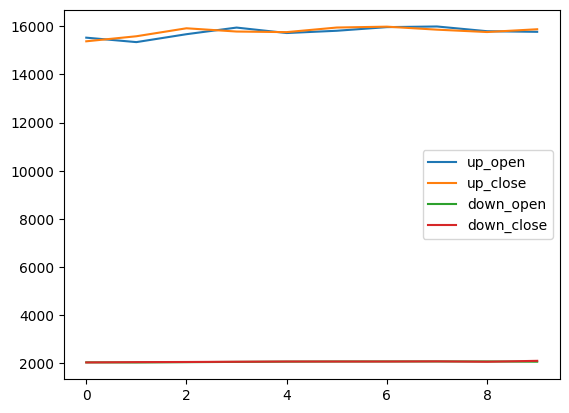

In [53]:
plt.plot(up_values["open"], label="up_open")
plt.plot(up_values["close"], label="up_close")
plt.plot(down_values["open"], label="down_open")
plt.plot(down_values["close"], label="down_close")
plt.legend()

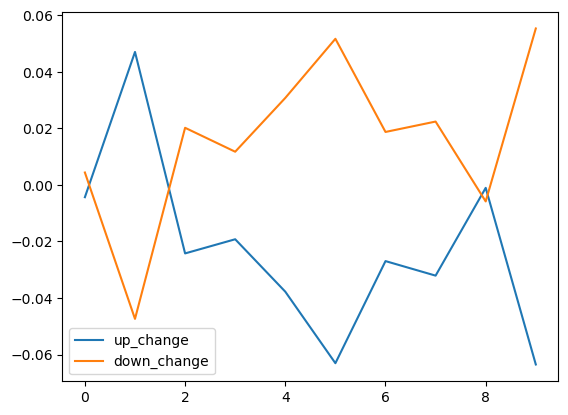

In [230]:
plt.plot(up_values["change"], label="up_change")
plt.plot(down_values["change"], label="down_change")
plt.legend()

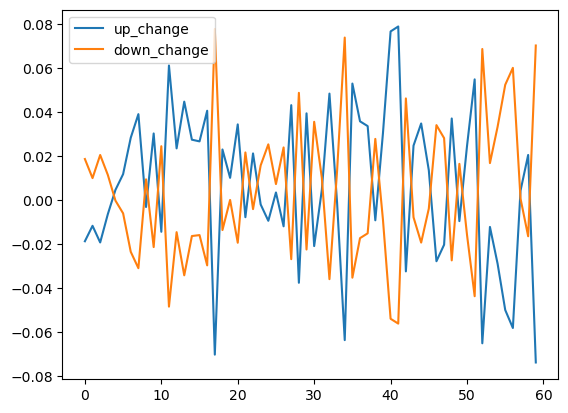

In [213]:
plt.plot(up_values["change"], label="up_change")
plt.plot(down_values["change"], label="down_change")
plt.legend()

In [242]:
window = 90

up_values, up_count = 0,0
down_values, down_count = 0,0

for df in [if0_df, ih0_df, ic0_df, sc0_df, lh0_df]:
    change = df.loc[1:,"close"].values - df.loc[:(df.shape[0]-2),"close"].values
    change = np.hstack([[0], change])

    df["label"] = (df["close"] - df["open"]).apply(lambda x:1 if x>0 else 0)
    df["change"] = (change / df.loc[:,"close"].values) * 100
    
    for i in range(window, df.shape[0]-window):
        if df.loc[i+window,"label"] == 1:
            up_values += df.drop(["label","datetime"],axis=1).iloc[i:window+i,:].reset_index(drop=True)
            up_count += 1
        else:
            down_values += df.drop(["label","datetime"],axis=1).iloc[i:window+i,:].reset_index(drop=True)
            down_count += 1
    break
        
up_values = up_values / up_count
down_values = down_values / down_count

In [239]:
up_10 = df[df["label"] == 1].index[10:]
down_10 = df[df["label"] == 0].index[:10]

In [241]:
up_30 = df[df["label"] == 1].index[30:]
down_30 = df[df["label"] == 0].index[:30]

In [243]:
up_90 = df[df["label"] == 1].index[90:]
down_90 = df[df["label"] == 0].index[:90]

In [246]:
up_10, up_30, up_90.shape

(Int64Index([  19,   21,   23,   26,   29,   30,   31,   33,   34,   36,
             ...
             1318, 1319, 1320, 1322, 1324, 1327, 1332, 1334, 1340, 1344],
            dtype='int64', length=651),
 Int64Index([  60,   63,   64,   65,   72,   74,   75,   76,   77,   80,
             ...
             1318, 1319, 1320, 1322, 1324, 1327, 1332, 1334, 1340, 1344],
            dtype='int64', length=631),
 (571,))

In [6]:

train_df = df[df["datetime"] < '2020-07-01'].reset_index(drop=True)
# train_data = train_df.drop(["datetime","label"], axis=1).values, train_df["label"].values

valid_df = df[(df["datetime"] > "2020-07-01") & (df["datetime"] < "2021-01-01")].reset_index(drop=True)
# valid_data = valid_df.drop(["datetime","label"], axis=1).values, valid_df["label"].values

test_df = df[df["datetime"] > "2022-01-01"].reset_index(drop=True)
# test_data = test_df.drop(["datetime","label"], axis=1).values, test_df["label"].values


In [7]:
def split_sequences(df, window=30, step=1):
    X,y = [],[]
    for i in range(0, df.shape[0]-window-1, step):
        X.append(df.iloc[i:window+i,:].values)
        y.append(df.loc[i+window,"label"])

    return np.array(X), np.array(y)

from copy import deepcopy
train_data = split_sequences(df=deepcopy(train_df.drop(["datetime"], axis=1)))
valid_data = split_sequences(df=deepcopy(valid_df.drop(["datetime"], axis=1)))
test_data = split_sequences(df=deepcopy(test_df.drop(["datetime"], axis=1)))

In [8]:

sys.path.append("D:/quant")
from models import LSTMModel, LSTM, ALSTM, TCN

model = ALSTM(d_feat=train_data[0].shape[2], log_path="./")
model.fit(train_data,
        valid_data,
        save_path="D:/quant/checkpoint/model.pt")

preds = model.predict(test_data[0])
print(preds.shape)

D:\anaconda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-08-25 08:53:02,873 - alstm.py[line:57] - INFO: ALSTM pytorch version...
2022-08-25 08:53:02,873 - alstm.py[line:74] - INFO: ALSTM parameters setting:
d_feat : 11
hidden_size : 64
num_layers : 2
dropout : 0.0
n_epochs : 200
lr : 0.001
metric : 
batch_size : 32
early_stop : 20
optimizer : adam
loss_type : mse
device : cpu
use_GPU : False
seed : None
2022-08-25 08:53:02,873 - alstm.py[line:117] - INFO: model:
ALSTMModel(
  (net): Sequential(
    (fc_in): Linear(in_features=11, out_features=64, bias=True)
    (act): Tanh()
  )
  (rnn): GRU(64, 64, num_layers=2, batch_first=True)
  (fc_out): Linear(in_features=128, out_features=1, bias=True)
  (att_net): Sequential(
    (att_fc_in): Linear(in_features=64, out_features=32, bias=True)
    (att_dropout): Dro

(108,)


In [16]:
preds.shape, test_data[1].shape, test_df.shape

((108,), (108,), (139, 12))

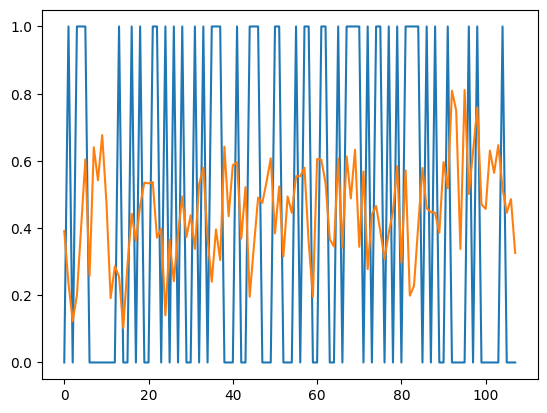

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(len(preds)), test_data[1])

plt.plot(range(len(preds)), preds)